In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv("products.csv")

df2=pd.read_csv("departments.csv")

df3=pd.read_csv("order_products__prior.csv")

df4=pd.read_csv("orders.csv")

df5=pd.read_csv("aisles.csv")


df6=pd.merge(df,df2, on='department_id')
df6=pd.merge(df6,df3, on='product_id')
df6=pd.merge(df6,df4, on='order_id')
df6=pd.merge(df6,df5, on='aisle_id')
print(df6.head())
print(df6.shape)

print(df6.info())

print(df.isnull().sum())




   product_id                product_name  aisle_id  department_id department  \
0           1  Chocolate Sandwich Cookies        61             19     snacks   
1           1  Chocolate Sandwich Cookies        61             19     snacks   
2           1  Chocolate Sandwich Cookies        61             19     snacks   
3           1  Chocolate Sandwich Cookies        61             19     snacks   
4           1  Chocolate Sandwich Cookies        61             19     snacks   

   order_id  add_to_cart_order  reordered  user_id eval_set  order_number  \
0      1107                  7          0    38259    prior             2   
1      5319                  3          1   196224    prior            65   
2      7540                  4          1   138499    prior             8   
3      9228                  2          0    79603    prior             2   
4      9273                 30          0    50005    prior             1   

   order_dow  order_hour_of_day  days_since_prior_

In [3]:
df6.shape


(32434489, 15)

In [4]:
sampled_df = df6.sample(n=1000000, random_state=42)  # Change the value of n to 200000 for 200,000 rows


In [5]:
sampled_df.shape

(1000000, 15)

In [6]:

sampled_df = sampled_df.dropna()

sampled_df.isnull().sum()
sampled_df.shape

(936029, 15)

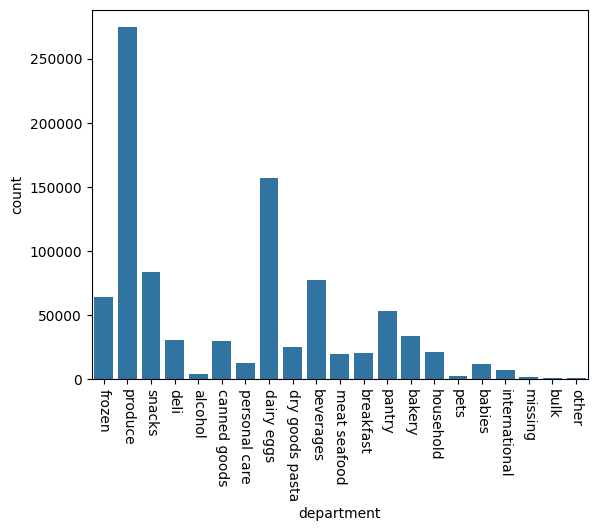

In [7]:
#lets do some data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='department',data=sampled_df)
plt.xticks(rotation=-90)
plt.show()


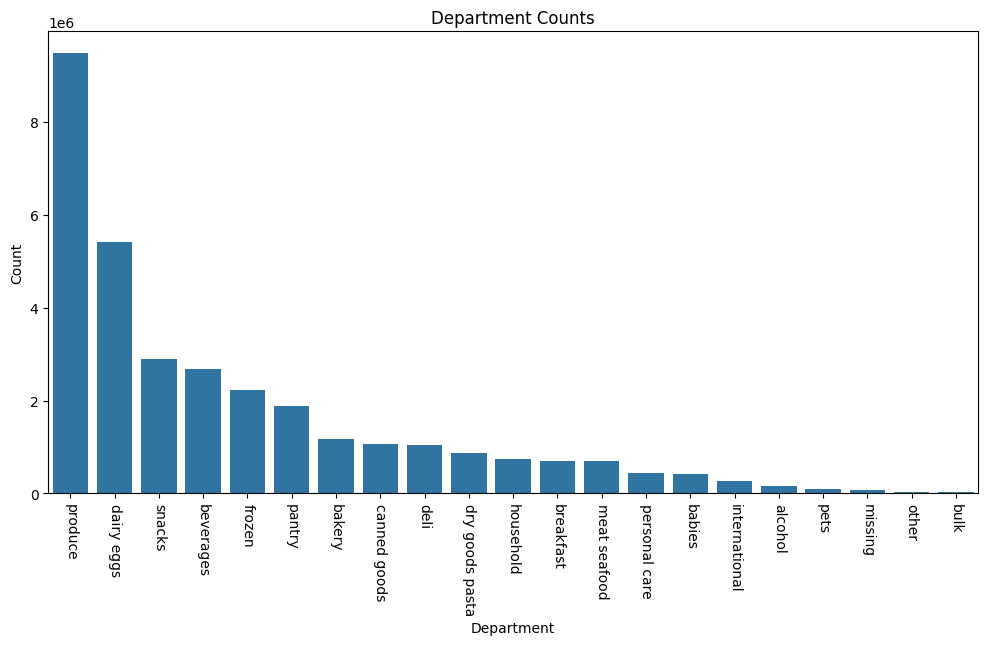

In [8]:
department_counts = df6['department'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department Counts')
plt.xticks(rotation=-90)
plt.show()


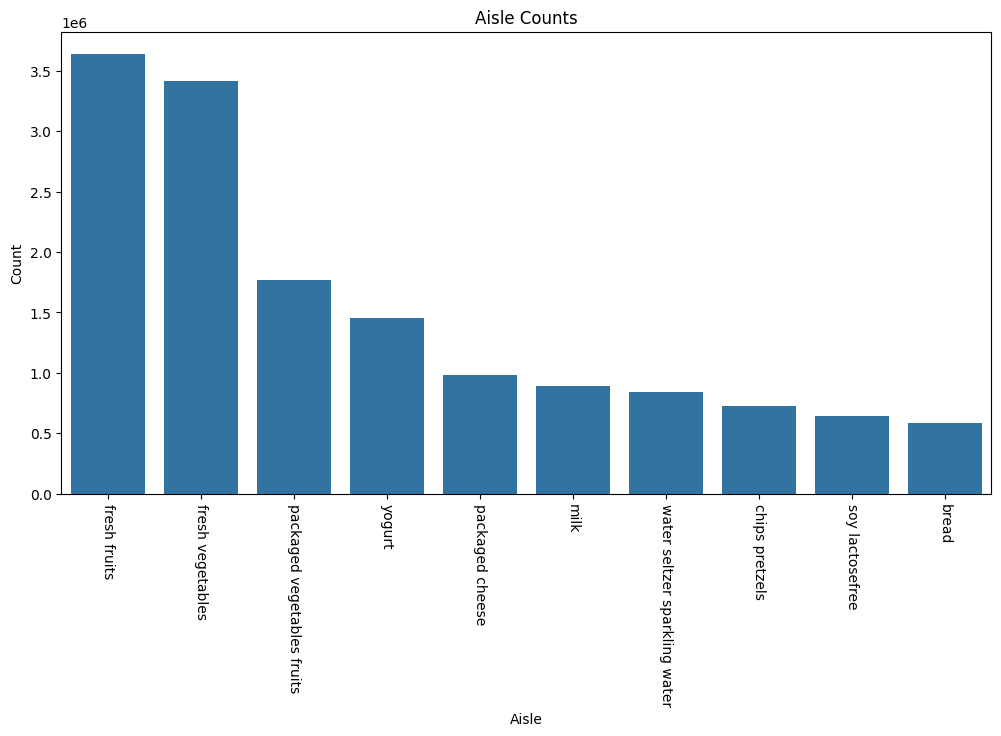

In [9]:
#top 10 aisle counts
aisle_counts = df6['aisle'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=aisle_counts.index, y=aisle_counts.values)
plt.xlabel('Aisle')
plt.ylabel('Count')
plt.title('Aisle Counts')
plt.xticks(rotation=-90)
plt.show()


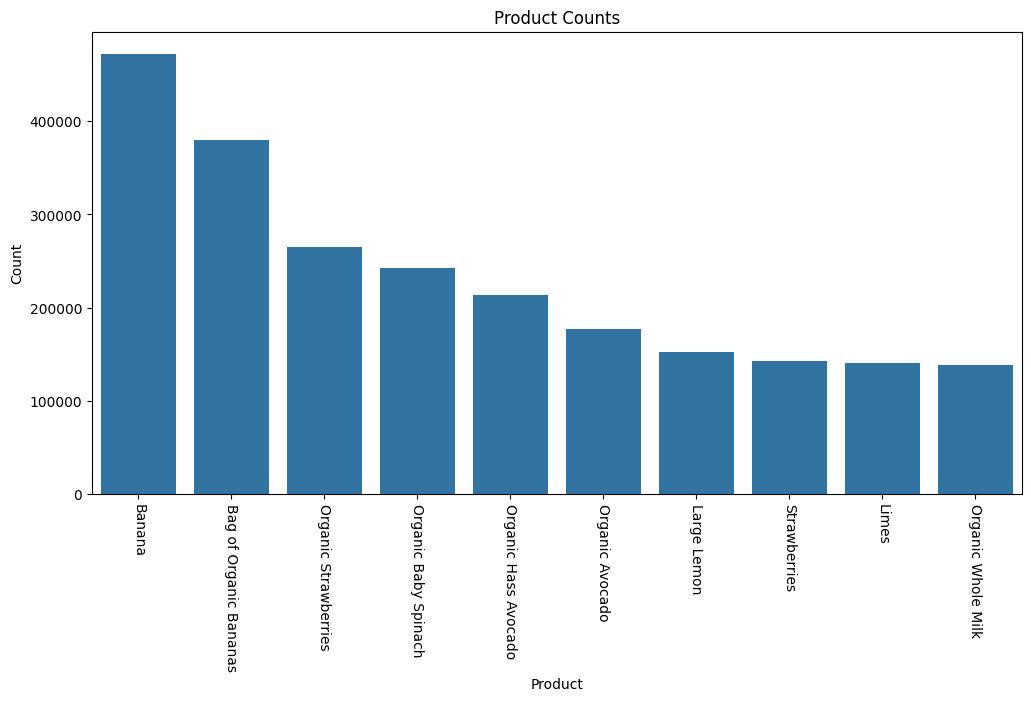

In [10]:
#top 10 product counts
product_counts = df6['product_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Counts')
plt.xticks(rotation=-90)
plt.show()


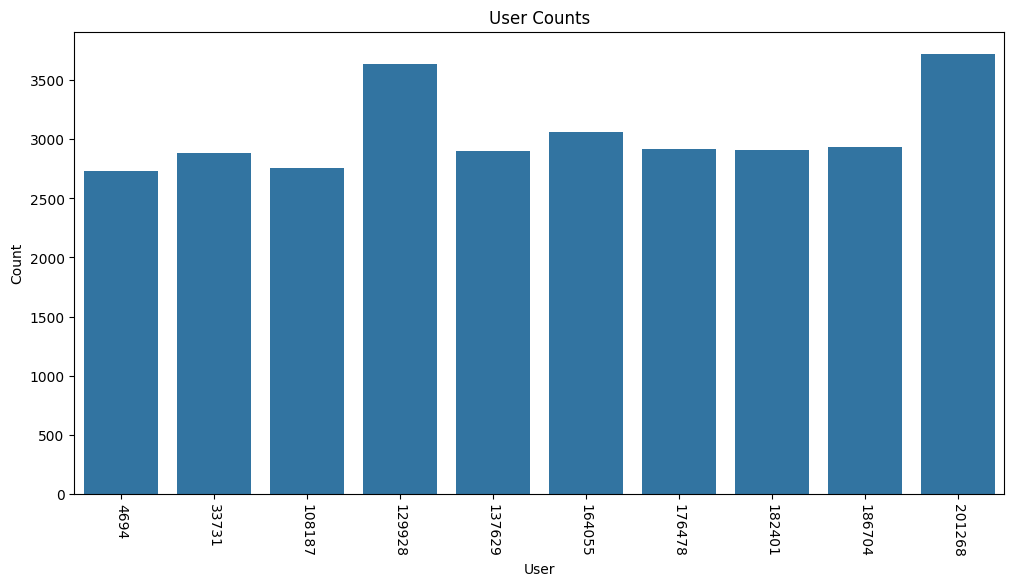

In [11]:
#top 10 user counts
user_counts = df6['user_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=user_counts.index, y=user_counts.values)
plt.xlabel('User')
plt.ylabel('Count')
plt.title('User Counts')
plt.xticks(rotation=-90)
plt.show()


In [12]:
sampled_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'department',
       'order_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle'],
      dtype='object')

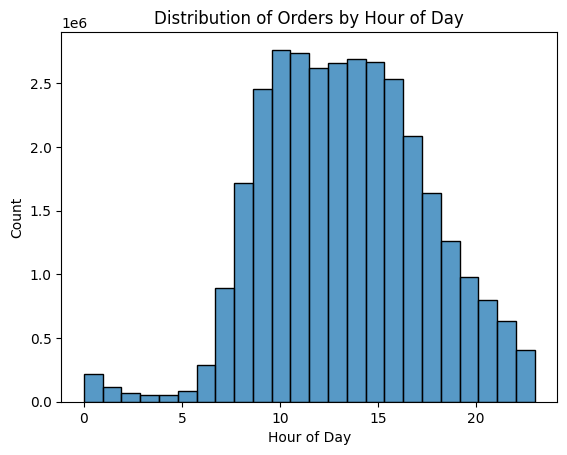

In [13]:
sns.histplot(df6, x='order_hour_of_day', bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Distribution of Orders by Hour of Day')
plt.show()
#what we see in the plot?
#Most orders are placed between 8am and 6pm, with the most orders being placed at 10am.b

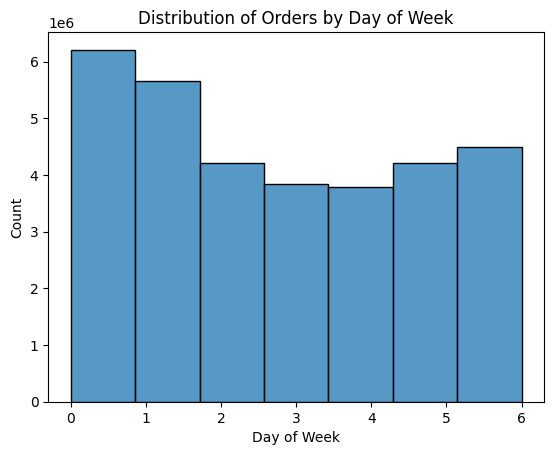

In [14]:
#what more plots can we do?
#We can also plot the distribution of orders by day of week and the distribution of orders by days since prior order.

sns.histplot(df6, x='order_dow', bins=7)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Orders by Day of Week')
plt.show()
#what we see in the plot?
#Most orders are placed on Sunday and Monday, with the fewest orders being placed on Wednesday.b

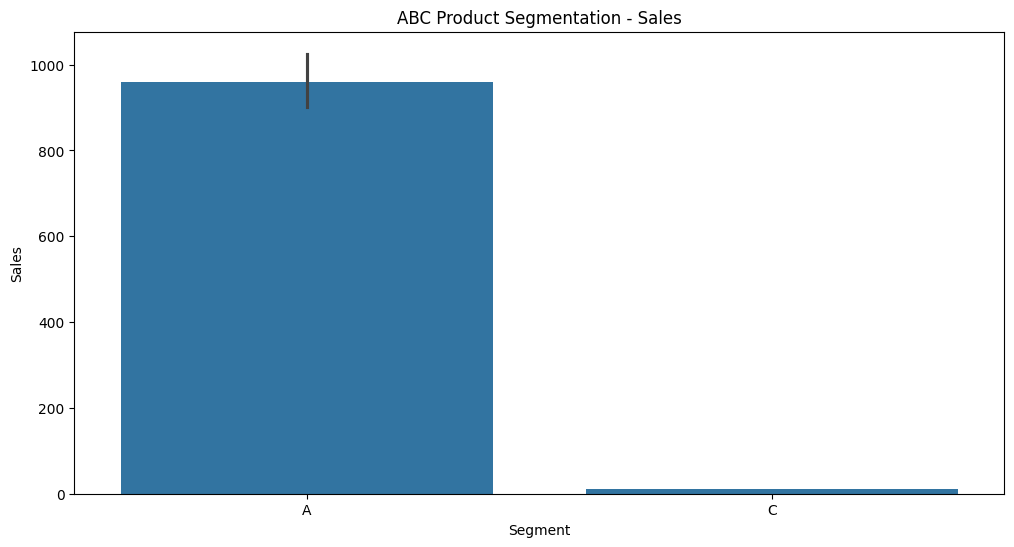

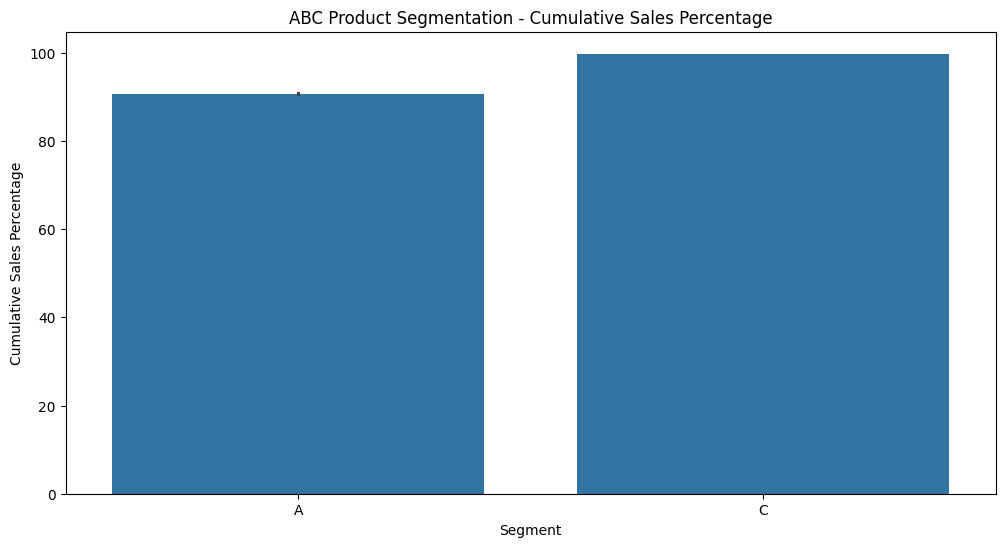

In [13]:
# Step 1: Calculate total sales for each product
product_sales = df6.groupby('product_name')['order_id'].count().reset_index()
product_sales.columns = ['product_name', 'sales']

# Step 2: Sort products based on sales in descending order
product_sales = product_sales.sort_values('sales', ascending=False)

# Step 3: Calculate cumulative sales percentage
product_sales['cumulative_sales'] = product_sales['sales'].cumsum()
product_sales['cumulative_sales_percentage'] = (product_sales['cumulative_sales'] / product_sales['sales'].sum()) * 100

# Step 4: Segment products into A, B, and C categories
total_products = len(product_sales)
a_threshold = int(total_products * 0.2)
b_threshold = int(total_products * 0.5)

product_sales['segment'] = 'C'
product_sales.loc[:a_threshold, 'segment'] = 'A'
product_sales.loc[a_threshold:b_threshold, 'segment'] = 'B'

# Step 5: Generate plots to visualize the segmentation
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='sales', data=product_sales)
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('ABC Product Segmentation - Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='cumulative_sales_percentage', data=product_sales)
plt.xlabel('Segment')
plt.ylabel('Cumulative Sales Percentage')
plt.title('ABC Product Segmentation - Cumulative Sales Percentage')
plt.show()


,product_name,sales,cumulative_sales,cumulative_sales_percentage,segment
49238,Xylitol Spearmint Gum Bottle,25,32249926,99.430967,C
11312,"Creme Pie, Lemon Meringue",25,32249951,99.431044,C
45706,Triple Action Relief Eye Drops,25,32249976,99.431121,C
34268,Pear Applesauce,25,32250001,99.431198,C
37563,Red Berry Vodka,25,32250026,99.431275,C
15603,French Milled Shea Butter Oval Soap,25,32250051,99.431352,C
48804,Whole Seeded Watermelon,25,32250076,99.431429,C
41958,Special K Fudge Dipped Pretzels,25,32250101,99.431506,C
3643,Balsamic Vinaigrette Calorie Free,25,32250126,99.431583,C
14298,Extra Sharp Australian Cheddar Cheese,25,32250151,99.431661,C


^C



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/b0/68/781d0026a100106b64e4501c76621dfcd0d3c29a546094fcffaa73037a74/dash-2.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for Flask<3.1,>=1.0.4 from https://files.pythonhosted.org/packages/93/a6/aa98bfe0eb9b8b15d36cdfd03c8ca86a03968a87f27ce224fb4f766acb23/flask-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug<3.1 from https://files.pythonhosted.org/packages/c3/fc/254c3e9b5feb89ff5b9076a23218dafbc99c96ac5941e900b71206e6313b/werkzeug-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for plotly>=5.0.0 from https://files.pythonhosted.org/packages/27/ae/c9fb759b36bc55ccc382b647d1afc23c2a860be8e835f96249996d0aa4df/plotly-5.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Assuming df6 is your DataFrame
# You should have your df6 data frame loaded here

app = dash.Dash(__name__)

# Department Counts Plot
department_counts = df6['department'].value_counts()
fig_dept_counts = px.bar(
    x=department_counts.index,
    y=department_counts.values,
    labels={'x': 'Department', 'y': 'Count'},
    title='Department Counts'
)
fig_dept_counts.update_layout(xaxis_tickangle=-90)

# Top 10 Aisle Counts Plot
aisle_counts = df6['aisle'].value_counts().head(10)
fig_aisle_counts = px.bar(
    x=aisle_counts.index,
    y=aisle_counts.values,
    labels={'x': 'Aisle', 'y': 'Count'},
    title='Top 10 Aisle Counts'
)
fig_aisle_counts.update_layout(xaxis_tickangle=-90)

# Top 10 Product Counts Plot
product_counts = df6['product_name'].value_counts().head(10)
fig_product_counts = px.bar(
    x=product_counts.index,
    y=product_counts.values,
    labels={'x': 'Product', 'y': 'Count'},
    title='Top 10 Product Counts'
)
fig_product_counts.update_layout(xaxis_tickangle=-90)

# Top 10 User Counts Plot
user_counts = df6['user_id'].value_counts().head(10)
fig_user_counts = px.bar(
    x=user_counts.index,
    y=user_counts.values,
    labels={'x': 'User', 'y': 'Count'},
    title='Top 10 User Counts'
)
fig_user_counts.update_layout(xaxis_tickangle=-90)

# Distribution of Orders by Hour of Day Plot
fig_order_hour = px.histogram(
    df6,
    x='order_hour_of_day',
    nbins=24,
    labels={'x': 'Hour of Day', 'y': 'Count'},
    title='Distribution of Orders by Hour of Day'
)

# Distribution of Orders by Day of Week Plot
fig_order_dow = px.histogram(
    df6,
    x='order_dow',
    nbins=7,
    labels={'x': 'Day of Week', 'y': 'Count'},
    title='Distribution of Orders by Day of Week'
)

app.layout = html.Div(children=[
    html.H1(children='Market Analysis Dashboard'),
    dcc.Graph(figure=fig_dept_counts),
    dcc.Graph(figure=fig_aisle_counts),
    dcc.Graph(figure=fig_product_counts),
    dcc.Graph(figure=fig_user_counts),
    dcc.Graph(figure=fig_order_hour),
    dcc.Graph(figure=fig_order_dow),
])

if __name__ == '__main__':
    app.run_server(debug=True,port=8070)
